<h2>Load Main Function</h2>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys 
sys.path.append(os.path.abspath("/home/jma/Desktop/Nov_17_Meetup"))
from pdp import *



<h2>Create training data and fit a model</h2>

<h3>The dataset being used is the famous boston data set where we will be predicting the median house price (000's) based on a variety of attributes:

<br><br>

<pre>
    1. CRIM      Per capita crime rate by town
    2. ZN        Proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     Proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river)
    5. NOX       Nitric oxides concentration (parts per 10 million)
    6. RM        Average number of rooms per dwelling
    7. AGE       Proportion of owner-occupied units built prior to 1940
    8. DIS       Weighted distances to five Boston employment centres
    9. RAD       Index of accessibility to radial highways
    10. TAX      Full-value property-tax rate per $10,000
    11. PTRATIO  Pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
</pre>

</h3>

Distrbution of y:


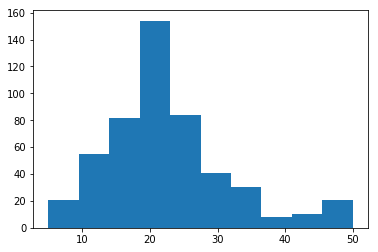

(Rows,Columns) of X: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target

print ("Distrbution of y:")
plt.hist(y)
plt.show()

print ("(Rows,Columns) of X:", X.shape)
X.head()

<h3>Catboost is a newly opened sourced gradient boosting library from Yandex a Russian search company. It has shown to often outperform the state-of-the-art gradient boosted tree libraries such as xgboost on some published benchmark.


</h3>

In [3]:
#build simple model

from catboost import CatBoostRegressor

# init
model = CatBoostRegressor(iterations=20, depth=3, learning_rate=0.1, loss_function='RMSE', verbose=True)

#train the model
model.fit(X, y, verbose=True)



Borders for float features generated
0:	learn 22.22642386	total: 80.4ms	remaining: 1.53s
1:	learn 20.27322494	total: 122ms	remaining: 1.1s
2:	learn 18.51592195	total: 164ms	remaining: 927ms
3:	learn 16.94350451	total: 197ms	remaining: 788ms
4:	learn 15.5605228	total: 239ms	remaining: 716ms
5:	learn 14.30444261	total: 280ms	remaining: 654ms
6:	learn 13.14480117	total: 322ms	remaining: 598ms
7:	learn 12.21769847	total: 364ms	remaining: 546ms
8:	learn 11.23850792	total: 405ms	remaining: 496ms
9:	learn 10.40834336	total: 447ms	remaining: 447ms
10:	learn 9.680501702	total: 488ms	remaining: 399ms
11:	learn 9.037689001	total: 626ms	remaining: 417ms
12:	learn 8.445766535	total: 805ms	remaining: 433ms
13:	learn 7.942080092	total: 846ms	remaining: 362ms
14:	learn 7.503993681	total: 887ms	remaining: 296ms
15:	learn 7.094209266	total: 929ms	remaining: 232ms
16:	learn 6.65763786	total: 970ms	remaining: 171ms
17:	learn 6.306512493	total: 1.01s	remaining: 112ms
18:	learn 5.994860928	total: 1.05s	rema

<h3>

LSTAT and RM are the most important variables in the model, based on the single criteria Catboost currently offers.

</h3>

In [4]:
#Feature importance (python 3)

pd.DataFrame(list(zip(model.feature_importances_, X.columns.values)), columns=['Score','Predictor']).sort_values('Score', ascending=False)

,Score,Predictor
12,42.829280,LSTAT
5,35.149502,RM
2,6.642843,INDUS
8,5.174527,RAD
7,4.434905,DIS
6,2.071049,AGE
3,1.169380,CHAS
11,0.969368,B
10,0.932101,PTRATIO
0,0.435893,CRIM


<h2><u>Demonstrate PDP in one and two variables</u></h2>

<h3> 1-D Example : Lets see how the model output changes as we change LSTAT</h3>

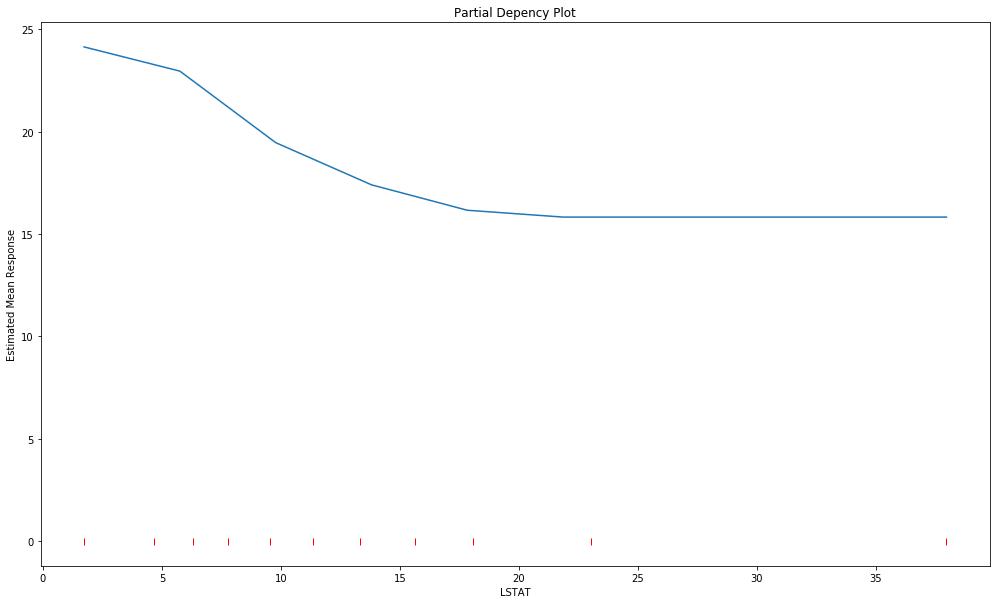

In [7]:
pred_grid1=partial_dependency(
    X = X, #training data as pandas DF
    model = model, #the model object to use to score 
    pred_vars = ['LSTAT'], #list of the predictors within model and X 
    grid=None, #will use min, max and "resolution" numbers between min and max linearly
    resolution=[10], #number of points sampled between min and max of pred_vars, as list , 
    type="regression", #'regression' or 'classification' 
    proba=False, # if classification, call predict_proba versus predict 
    parallel =True, #multiprocressing 
    n_jobs=4, #number of cores to run on if parallel 
    verbose =0, #verbose level for joblib 
    orig=2, #original density of modeled event if over sampled classification (leave to 2 if no oversampling)
    osp=2, #oversampled denisty of modeled evenet of modeled event if over sampled classification (leave to 2 if no oversampling)
    temp_folder="/tmp", #where to write pickeled objects for parallel processing
    plot=True, #if True then plot, else just return data
    save_path=None, #path to save plot
    returnfig=True, #show the plot
    values=False, #call X.values before scoring,
    xgbDmatrix = False # if convert X to Dmatrix in xgboost 
)



<h2>Above we see that as LSTAT increases, the mean model prediction decreases monotonically. Note rug plot values</h2>

In [8]:
print(pred_grid1.shape)
pred_grid1.head(n=5)

(10, 2)


,LSTAT,response
0,1.730000,24.138934
1,5.756667,22.955996
2,9.783333,19.463044
3,13.810000,17.402094
4,17.836667,16.160052


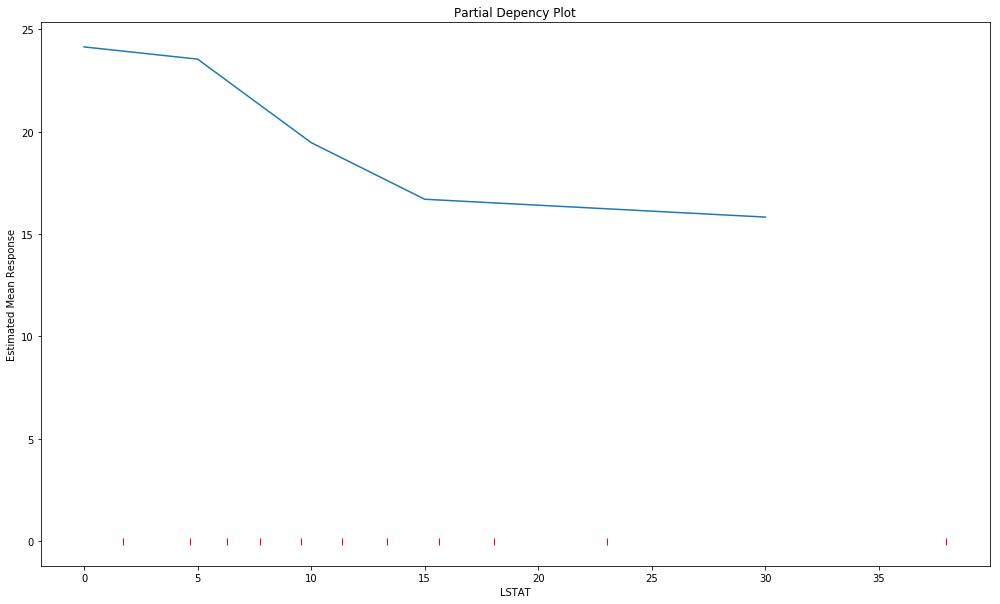

In [9]:
#example using a user defined grid


pred_grid1=partial_dependency(
    X = X, #training data as pandas DF
    model = model, #the model object to use to score 
    pred_vars = ['LSTAT'], #list of the predictors within model and X 
    
    
    
    grid=[0,5,10,15,30], #list 
    resolution=None, #set to None 
    
    
    type="regression", #'regression' or 'classification' 
    proba=False, # if classification, call predict_proba versus predict 
    parallel =True, #multiprocressing 
    n_jobs=4, #number of cores to run on if parallel 
    verbose =0, #verbose level for joblib 
    orig=2, #original density of modeled event if over sampled classification (leave to 2 if no oversampling)
    osp=2, #oversampled denisty of modeled evenet of modeled event if over sampled classification (leave to 2 if no oversampling)
    temp_folder="/tmp", #where to write pickeled objects for parallel processing
    plot=True, #if True then plot, else just return data
    save_path=None, #path to save plot
    returnfig=True, #show the plot
    values=False, #call X.values before scoring,
    xgbDmatrix = False # if convert X to Dmatrix in xgboost 
)


<h3>2-D Example : Lets see how the model output changes as we change LSTAT and RM </h3>

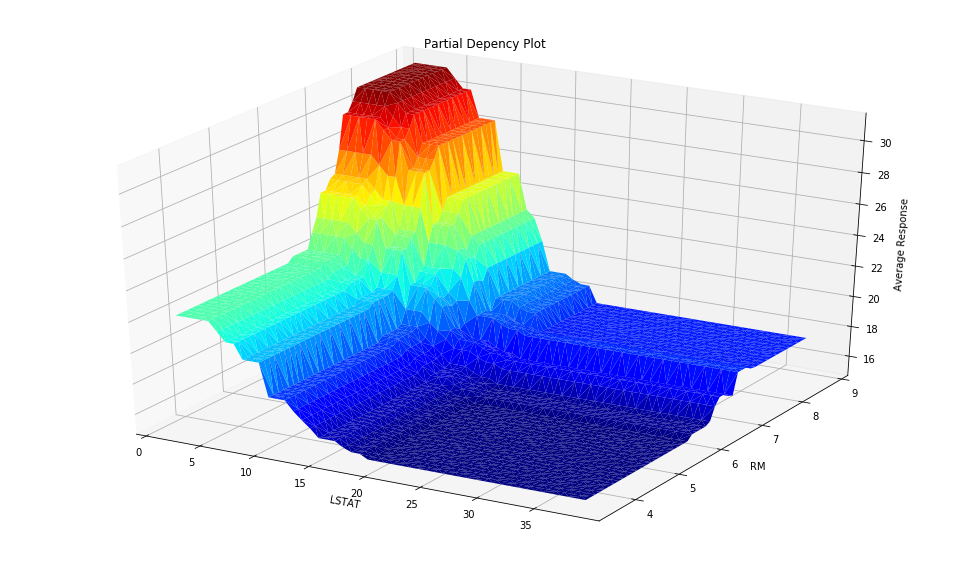

In [10]:
pred_grid2=partial_dependency(
    X = X, #training data as pandas DF
    model = model, #the model object to use to score  
    pred_vars = ['LSTAT','RM'], #list of predictors within model and X 
    grid=None, #will use min, max and "resolution" numbers between min and max linearly
    resolution=[50,50], #number of points sampled between min and max of pred_vars, as list , 
    type="regression", #'regression' or 'classification' 
    proba=False, # if classification, call predict_proba versus predict 
    parallel =True, #multiprocressing 
    n_jobs=4, #number of cores to run on if parallel 
    verbose =0, #verbose level for joblib 
    orig=2, #original density of modeled event if over sampled classification (leave to 2 if no oversampling)
    osp=2, #oversampled denisty of modeled evenet of modeled event if over sampled classification (leave to 2 if no oversampling)
    temp_folder="/tmp", #where to write pickeled objects for parallel procressing
    plot=True, #if True then plot, else just return data
    save_path=None, #path to save plot
    returnfig=True, #show the plot
    values=False, #call X.values before scoring,
    xgbDmatrix = False # if convert X to Dmatrix in xgboost 
)


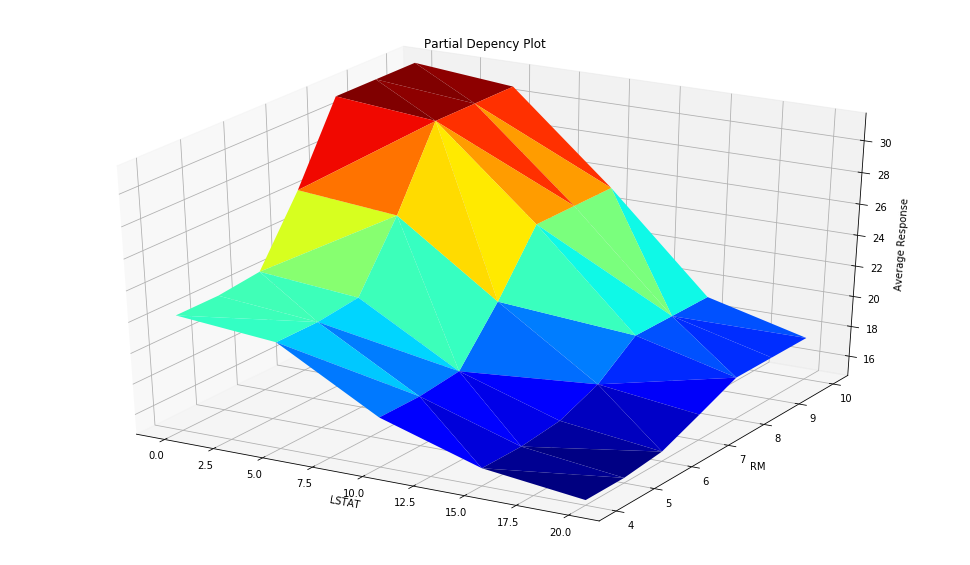

In [11]:
#user defined grid

pred_grid2=partial_dependency(
    X = X, #training data as pandas DF
    model = model, #the model object to use to score  
    pred_vars = ['LSTAT','RM'], #list of predictors within model and X 
    
    
    grid=[[0,5,10,15,20],[4,5,6,7,8,9,10]], #will use min, max and "resolution" numbers between min and max linearly
    resolution=None, #set to none
    
    
    type="regression", #'regression' or 'classification' 
    proba=False, # if classification, call predict_proba versus predict 
    parallel =True, #multiprocressing 
    n_jobs=4, #number of cores to run on if parallel 
    verbose =0, #verbose level for joblib 
    orig=2, #original density of modeled event if over sampled classification (leave to 2 if no oversampling)
    osp=2, #oversampled denisty of modeled evenet of modeled event if over sampled classification (leave to 2 if no oversampling)
    temp_folder="/tmp", #where to write pickeled objects for parallel procressing
    plot=True, #if True then plot, else just return data
    save_path=None, #path to save plot
    returnfig=True, #show the plot
    values=False, #call X.values before scoring,
    xgbDmatrix = False # if convert X to Dmatrix in xgboost 
)

In [12]:
pred_grid2.head(15)

,LSTAT,RM,response
0,0,4,22.217141
1,0,5,22.217141
2,0,6,22.518427
3,0,7,26.568414
4,0,8,31.374873
5,0,9,31.374873
6,0,10,31.374873
7,5,4,21.620325
8,5,5,21.620325
9,5,6,21.921611


In [21]:
#use the returned table and plot using plotly or other analysis
import plotly
plotly.tools.set_credentials_file(username='allardjm', api_key='Trt98gnXWcYprRD31HpB')
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Mesh3d(x=pred_grid2.LSTAT,y=pred_grid2.RM,z=pred_grid2.response,opacity=0.75)

layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='LSTAT',showbackground=True, backgroundcolor="rgb(172, 186, 182)"),
                    yaxis = dict(
                        title='RM',showbackground=True,backgroundcolor="rgb(172, 186, 182)"),
                    zaxis = dict(
                        title='Mean Response',showbackground=True),),
                    width=750,
                    height=750,
                    title="PDP Plot"
                  )
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)
